<a href="https://colab.research.google.com/github/AnitaTasnim/fish_disease_paper_work/blob/main/water_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python import metrics
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.applications import resnet
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import mobilenet_v2
import seaborn as sn
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.regularizers import l2

Count images of dataset

In [ ]:
base_dir=r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset"

In [ ]:
dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\Argulus"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Argulus:', count)

dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\Broken antennae and rostrum"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Broken antennae and rostrum:', count)

dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\EUS"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('EUS:', count)

dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\Healthy Fish"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Healthy Fish:', count)

dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\Redspot"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Redspot:', count)

dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\Tail And Fin Rot"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Tail And Fin Rot:', count)

dir_path = r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\THE BACTERIAL GILL ROT"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('THE BACTERIAL GILL ROT:', count)


Argulus: 290
Broken antennae and rostrum: 290
EUS: 290
Healthy Fish: 290
Redspot: 290
Tail And Fin Rot: 290
THE BACTERIAL GILL ROT: 290


Pre-processing the images of dataset using preprocessing module

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split = 0.2
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

Resizing the images and define the train and test dataset

In [ ]:
train_datagen = train_datagen.flow_from_directory(
     base_dir,
     target_size = (IMAGE_SIZE, IMAGE_SIZE),
     batch_size = BATCH_SIZE,
     subset = 'training'


)
test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'validation'


)

Found 1624 images belonging to 7 classes.
Found 406 images belonging to 7 classes.


In [ ]:
x_train,y_train=next(train_datagen)
x_test,y_test= next(test_datagen)

In [ ]:
c = train_datagen.class_indices
classes = list(c.keys())
classes

['Argulus',
 'Broken antennae and rostrum',
 'EUS',
 'Healthy Fish',
 'Redspot',
 'THE BACTERIAL GILL ROT',
 'Tail And Fin Rot']

Build the model

In [ ]:
#custom built CNN model
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = (224,224,3)))
model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))


model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))

model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides= 2))

model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))


model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides= 2))


model1.add(tf.keras.layers.Flatten())

model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(tf.keras.layers.Dense(7,kernel_regularizer=l2(0.01),
     activation = 'softmax'))


model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 128)         73856     
                                                      

Training the Model

In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(from_logits=False,
    label_smoothing=0.0),metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history1 = model1.fit(
    train_datagen,
    epochs=20,
    validation_data=test_datagen,
    callbacks=[early_stopping]
)

Epoch 1/20
26/26 [==============================] - 84s 3s/step - loss: 1.9886 - accuracy: 0.2408 - val_loss: 2.0470 - val_accuracy: 0.1453
Epoch 2/20
26/26 [==============================] - 111s 4s/step - loss: 1.7699 - accuracy: 0.3553 - val_loss: 2.0153 - val_accuracy: 0.2635
Epoch 3/20
26/26 [==============================] - 112s 4s/step - loss: 1.5729 - accuracy: 0.4323 - val_loss: 1.9766 - val_accuracy: 0.2167
Epoch 4/20
26/26 [==============================] - 107s 4s/step - loss: 1.3915 - accuracy: 0.5092 - val_loss: 1.9586 - val_accuracy: 0.2291
Epoch 5/20
26/26 [==============================] - 109s 4s/step - loss: 1.2468 - accuracy: 0.5850 - val_loss: 1.8870 - val_accuracy: 0.2685
Epoch 6/20
26/26 [==============================] - 108s 4s/step - loss: 1.0886 - accuracy: 0.6422 - val_loss: 1.8482 - val_accuracy: 0.3571
Epoch 7/20
26/26 [==============================] - 104s 4s/step - loss: 1.0113 - accuracy: 0.6638 - val_loss: 1.7197 - val_accuracy: 0.3695
Epoch 8/20
26/

Evoluate the model accuracy

In [ ]:
loss, accuracy = model1.evaluate(test_datagen)
print('Test accuracy:', accuracy)

7/7 [==============================] - 4s 509ms/step - loss: 0.8818 - accuracy: 0.7389
Test accuracy: 0.738916277885437


In [ ]:
index=['Argulus',
 'Broken antennae and rostrum',
 'EUS',
 'Healthy Fish',
 'Redspot',
 'THE BACTERIAL GILL ROT',
 'Tail And Fin Rot']

1/1 [==============================] - 1s 576ms/step
Argulus


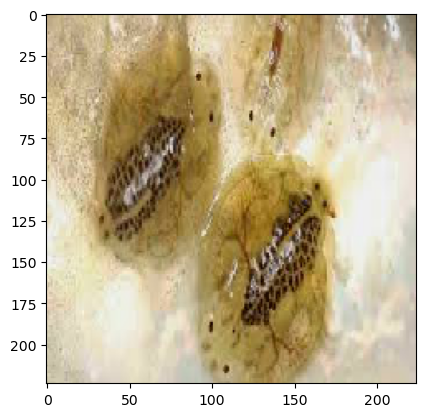

In [ ]:
img_pred = load_img(r"C:\Users\ASUS\Downloads\water fish\Fresh Water Fish Dataset\Argulus\argulus (5).jpg" ,target_size=(224,224))
plt.imshow(img_pred)
img_pred = img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result1 = np.argmax(model1.predict(img_pred/255.0),axis=1)
print(index[result1[0]])


#result=model1.predict(img_pred)

summarize history for model Accuracy

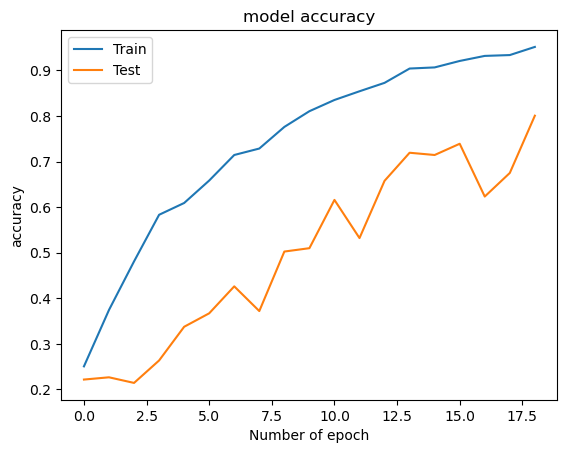

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Number of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Summarize history for model loss

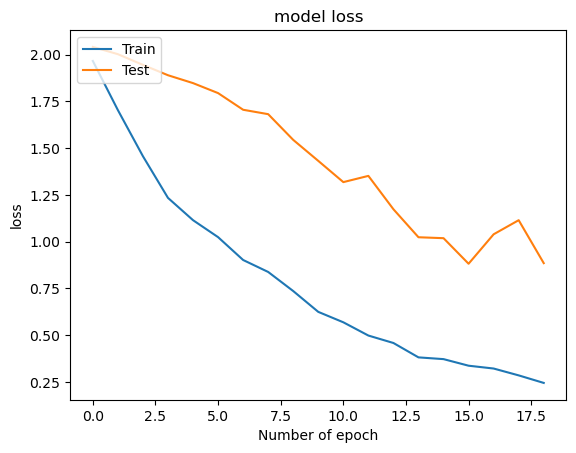

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Number of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Confusion Matrix

In [ ]:
x_train,y_train=next(train_datagen)
x_test,y_test= next(test_datagen)

In [ ]:
y_val_predicted = model1.predict(x_test)
y_val = [np.argmax(i) for i in y_test]
y_predicted = [np.argmax(i) for i in y_val_predicted]


2/2 [==============================] - 0s 204ms/step


Text(70.72222222222221, 0.5, 'True ')

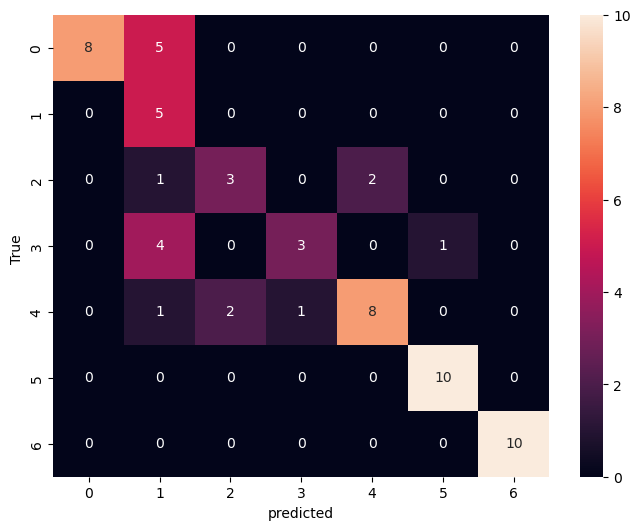

In [ ]:
cm = tf.math.confusion_matrix(y_val, y_predicted)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True ')

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.31      1.00      0.48         5
           2       0.60      0.50      0.55         6
           3       0.75      0.38      0.50         8
           4       0.80      0.67      0.73        12
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10

    accuracy                           0.73        64
   macro avg       0.77      0.74      0.71        64
weighted avg       0.83      0.73      0.75        64

